In [2]:
import pandas_datareader.data as web 
import pandas as pd 
import datetime as dt 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import style 
import yfinance as yf 

yf.pdr_override()

style.use("ggplot")

In [48]:
start = dt.datetime(2010,4,1)
end = dt.datetime(2023,4,1)

prices = web.get_data_yahoo("nke",start,end)["Close"]
daily_returns = prices.pct_change()
last_price = prices[-1]
last_price

[*********************100%***********************]  1 of 1 completed


122.63999938964844

In [43]:
# Number of simulations 
num_simulations = 5000
num_days = 720 #Two Years  
simulation_df = pd.DataFrame()

In [59]:
for x in range(num_simulations):
    count = 0 
    daily_SD = daily_returns.std()
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0,daily_SD))
    price_series.append(price)
    
    for y in range(num_days):
        if count == 720:
            break 
        price = price_series[count] * (1 + np.random.normal(0,daily_SD))
        price_series.append(price)
        count += 1 
    
    simulation_df[x] = price_series 

In [60]:
# x axis = number of simulations 
# y axis = number of days. 
simulation_df.head(-1) 

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,123.755192,126.318002,119.335049,125.418055,122.604456,121.733381,124.031287,124.273569,123.494291,124.431051,...,120.151092,121.448690,121.990085,124.811617,123.577684,121.462160,121.570922,121.397392,124.277171,119.859832
1,124.659636,125.440536,117.039154,125.900312,123.063033,120.948441,127.008118,124.506555,124.646345,121.920666,...,116.590301,121.290807,122.397497,124.799923,127.054390,122.421543,120.853885,124.167816,127.450419,121.213484
2,126.006198,120.244476,115.535169,125.796027,122.866020,122.977168,124.386168,124.757406,131.333771,119.499247,...,112.459115,120.621011,126.038477,121.599223,128.049842,125.051453,119.690832,123.663371,127.961944,119.028029
3,126.767722,122.589617,113.822247,123.672692,129.830450,123.630884,126.450618,125.075159,132.776706,120.009670,...,113.467739,119.069368,126.817313,122.558986,125.225078,124.947068,122.049675,119.093324,124.921458,119.866115
4,127.270353,125.550811,114.270255,119.592202,128.905271,124.175128,127.063397,121.884807,130.977328,118.865868,...,116.620765,116.674269,125.773175,123.044706,126.097309,125.087941,121.055377,119.386844,123.473740,121.010822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,76.171585,81.001609,82.033973,45.420572,52.500952,67.008645,70.198427,185.282404,180.974728,179.607503,...,101.599972,106.528057,68.270261,209.909532,341.419811,98.014949,47.838034,128.858907,139.327951,264.423612
716,75.535292,81.001469,81.975429,45.622977,51.406308,67.169930,71.046066,187.246469,177.898608,180.752289,...,98.722808,106.736206,69.847472,204.145590,337.560271,97.795342,47.496266,128.866741,140.283195,259.804511
717,75.137349,77.311718,81.993420,46.268354,51.211098,68.354738,71.030038,187.305109,183.761040,180.978351,...,99.143157,106.502076,70.649983,205.544131,334.890525,98.196644,48.139112,129.496109,142.240088,260.624906
718,75.089900,77.961290,82.087635,45.475219,52.251459,68.808040,69.700716,185.974157,187.481293,184.882390,...,102.848795,104.609107,70.173532,208.023980,328.406013,98.797466,48.767268,128.713319,145.161535,266.267964


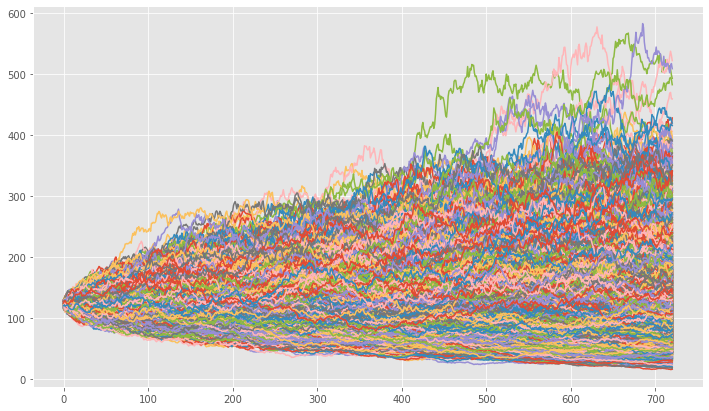

In [61]:
fig = plt.figure(figsize=(12,7))
plt.plot(simulation_df)
plt.show()